### Import libraries

In [7]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

### Initializing vizualization set

In [6]:
sns.set(style = "whitegrid", palette = "pastel", color_codes = True)
sns.mpl.rc("figure", figsize = (10,6))

In [8]:
%matplotlib inline

### Opening a Vector Map

In [44]:
shp_path = "/Users/nicolasdemuynck/BeCode/Github/data-visualization/sh_statbel_statistical_sectors_20200101.shp/sh_statbel_statistical_sectors_20200101.shp"
sf = shp.Reader(shp_path)

In [45]:
len(sf.shapes())

19794

In [46]:
sf.records()[0]

Record #0: ['11001A00-', 'AARTSELAAR-CENTRUM', 'AARTSELAAR-CENTRUM', 'AARTSELAAR-CENTRUM', '11001A', 'AARTSELAAR', 'AARTSELAAR', '11001', 'Aartselaar', 'Aartselaar', 'Aartselaar', '11000', 'Arrondissement Antwerpen', 'Arrondissement d’Anvers', 'Bezirk Antwerpen', '10000', 'Provincie Antwerpen', 'Province d’Anvers', 'Provinz Antwerpen', '02000', 'Vlaams Gewest', 'Région flamande', 'Flämische Region', 'BE', 'BE2', 'BE21', 'BE211', 53.158103, 5248.0]

In [47]:
sf.records ()[25]

Record #25: ['11002A11-', 'KIPDORP-ST.-JACOBS (SP.WALLEN)', 'KIPDORP-ST.-JACOBS (SP.WALLEN)', 'KIPDORP-ST.-JACOBS (SP.WALLEN)', '11002A', '1-2-3-4 ADMINISTR. WIJK OF DISTRICT', '1-2-3-4 ADMINISTR. WIJK OF DISTRICT', '11002', 'Antwerpen', 'Anvers', 'Antwerpen', '11000', 'Arrondissement Antwerpen', 'Arrondissement d’Anvers', 'Bezirk Antwerpen', '10000', 'Provincie Antwerpen', 'Province d’Anvers', 'Provinz Antwerpen', '02000', 'Vlaams Gewest', 'Région flamande', 'Flämische Region', 'BE', 'BE2', 'BE21', 'BE211', 19.510927, 2052.0]

In [49]:
sf.records ()[19793]

Record #19793: ['93090H091', "ROCHE A L'HOMME", "ROCHE A L'HOMME", "ROCHE A L'HOMME", '93090H', 'DOURBES*', 'DOURBES*', '93090', 'Viroinval', 'Viroinval', 'Viroinval', '93000', 'Arrondissement Philippeville', 'Arrondissement de Philippeville', 'Bezirk Philippeville', '90000', 'Provincie Namen', 'Province de Namur', 'Provinz Namur', '03000', 'Waals Gewest', 'Région wallonne', 'Wallonische Region', 'BE', 'BE3', 'BE35', 'BE353', 903.007902, 18791.0]

### Converting shapefile data on Pandas dataframe

In [50]:
def read_shapefile(sf):
    
    fields = [x[0] for x in sf.fields[1:]]
    records = sf.records ()
    shps = [s.points for s in sf.shapes()]
    
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords = shps)
    
    return df

In [51]:
df = read_shapefile (sf)
df.shape

(19794, 30)

In [52]:
df.sample (5) 
#last column shows the coordinates, latitude and longitude of every point.
#EOFORIGIN = Easting values, in metres.
#NOFORIGIN = Northing values , in metres.

,CS01012020,T_SEC_NL,T_SEC_FR,T_SEC_DE,C_NIS6,T_NIS6_NL,T_NIS6_FR,CNIS5_2020,T_MUN_NL,T_MUN_FR,...,T_REGIO_NL,T_REGIO_FR,T_REGIO_DE,C_COUNTRY,NUTS1,NUTS2,NUTS3,M_AREA_HA,M_PERI_M,coords
6684,35029X0JQ,STRAND,STRAND,STRAND,35029X,STRAND,STRAND,35029,De Haan,De Haan,...,Vlaams Gewest,Région flamande,Flämische Region,BE,BE2,BE25,BE255,413.708192,22132.0,"[(62220.84730000049, 223316.01509999856), (622..."
15127,71016B233,DRIEHOEVEN,DRIEHOEVEN,DRIEHOEVEN,71016B,WATERSCHEI - ZWARTBERG,WATERSCHEI - ZWARTBERG,71016,Genk,Genk,...,Vlaams Gewest,Région flamande,Flämische Region,BE,BE2,BE22,BE224,99.231423,4732.0,"[(229089.28130000085, 188937.1992000006), (229..."
2596,21016A72-,MELKRIEK,MELKRIEK,MELKRIEK,21016A,UKKEL,UCCLE,21016,Ukkel,Uccle,...,Brussels Hoofdstedelijk Gewest,Région de Bruxelles-Capitale,Region Brüssel-Hauptstadt,BE,BE1,BE10,BE100,13.848707,1571.0,"[(147053.65630000085, 164263.29300000146), (14..."
14987,71002A286,MOLENDEL,MOLENDEL,MOLENDEL,71002A,AS,AS,71002,As,As,...,Vlaams Gewest,Région flamande,Flämische Region,BE,BE2,BE22,BE224,68.005458,3938.0,"[(235662.99130000174, 190561.31269999966), (23..."
12424,61012A50-,PAIR-CENTRE,PAIR-CENTRE,PAIR-CENTRE,61012A,CLAVIER,CLAVIER,61012,Clavier,Clavier,...,Waals Gewest,Région wallonne,Wallonische Region,BE,BE3,BE33,BE331,29.595255,3121.0,"[(223617.1875, 126296.45699999854), (223624.53..."


In [54]:
df[df.T_MUN_NL == 'Brugge']

,CS01012020,T_SEC_NL,T_SEC_FR,T_SEC_DE,C_NIS6,T_NIS6_NL,T_NIS6_FR,CNIS5_2020,T_MUN_NL,T_MUN_FR,...,T_REGIO_NL,T_REGIO_FR,T_REGIO_DE,C_COUNTRY,NUTS1,NUTS2,NUTS3,M_AREA_HA,M_PERI_M,coords
5373,3100514MQ,MBZ,MBZ,MBZ,310051,WIJZIGING VAN GEMEENTEGRENS,WIJZIGING VAN GEMEENTEGRENS,31005,Brugge,Bruges,...,Vlaams Gewest,Région flamande,Flämische Region,BE,BE2,BE25,BE251,56.622603,4023.0,"[(70477.18909999728, 226160.88709999993), (704..."
5374,3100597MQ,VOORHAVEN,VOORHAVEN,VOORHAVEN,310059,WIJZIGING VAN GEMEENTEGRENS,WIJZIGING VAN GEMEENTEGRENS,31005,Brugge,Bruges,...,Vlaams Gewest,Région flamande,Flämische Region,BE,BE2,BE25,BE251,861.626365,14234.0,"[(70469.54270000011, 227379.0599000007), (7033..."
5375,31005A001,BRUGGE-CENTRUM - BELFORT,BRUGGE-CENTRUM - BELFORT,BRUGGE-CENTRUM - BELFORT,31005A,BRUGGE,BRUGGE,31005,Brugge,Bruges,...,Vlaams Gewest,Région flamande,Flämische Region,BE,BE2,BE25,BE251,23.851974,2263.0,"[(70430.0156000033, 211630.60550000146), (7040..."
5376,31005A012,SINT-WALBURGA,SINT-WALBURGA,SINT-WALBURGA,31005A,BRUGGE,BRUGGE,31005,Brugge,Bruges,...,Vlaams Gewest,Région flamande,Flämische Region,BE,BE2,BE25,BE251,17.063398,2358.0,"[(70513.50779999793, 211701.15239999816), (705..."
5377,31005A023,SINT-SALVATOR,SINT-SALVATOR,SINT-SALVATOR,31005A,BRUGGE,BRUGGE,31005,Brugge,Bruges,...,Vlaams Gewest,Région flamande,Flämische Region,BE,BE2,BE25,BE251,27.646269,2825.0,"[(69839.0156000033, 211723.90239999816), (6977..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5494,31005H210,ZEVENBERGEN,ZEVENBERGEN,ZEVENBERGEN,31005H,SINT-ANDRIES,SINT-ANDRIES,31005,Brugge,Bruges,...,Vlaams Gewest,Région flamande,Flämische Region,BE,BE2,BE25,BE251,95.331599,4372.0,"[(67509.97659999877, 209407.7617000006), (6747..."
5495,31005H382,ABDIJ ZEVENKERKE,ABDIJ ZEVENKERKE,ABDIJ ZEVENKERKE,31005H,SINT-ANDRIES,SINT-ANDRIES,31005,Brugge,Bruges,...,Vlaams Gewest,Région flamande,Flämische Region,BE,BE2,BE25,BE251,291.902389,7855.0,"[(66154.77340000123, 207052.55860000104), (661..."
5496,31005H391,SINT-ANNA IN DE WOESTIJN,SINT-ANNA IN DE WOESTIJN,SINT-ANNA IN DE WOESTIJN,31005H,SINT-ANDRIES,SINT-ANDRIES,31005,Brugge,Bruges,...,Vlaams Gewest,Région flamande,Flämische Region,BE,BE2,BE25,BE251,377.786739,8488.0,"[(66955.34380000085, 208234.7617000006), (6692..."
5497,31005H490,SPEIEN,SPEIEN,SPEIEN,31005H,SINT-ANDRIES,SINT-ANDRIES,31005,Brugge,Bruges,...,Vlaams Gewest,Région flamande,Flämische Region,BE,BE2,BE25,BE251,191.060345,7978.0,"[(66777.6406000033, 212577.18360000104), (6673..."


In [55]:
df.T_MUN_NL

0        Aartselaar
1        Aartselaar
2        Aartselaar
3        Aartselaar
4        Aartselaar
            ...    
19789     Viroinval
19790     Viroinval
19791     Viroinval
19792     Viroinval
19793     Viroinval
Name: T_MUN_NL, Length: 19794, dtype: object

### Plotting a specific shape

In [56]:
def plot_shape (id, s=None):
    plt.figure ()
    ax = plt.axes ()
    ax.set_aspect ('equal')
    shape_ex = sf.shape (id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len)(shape_ex.points),1)
    for ip in range (len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][0]
    
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

# Plot the shape based on a column's coordinates.
# Calculate and return the medium point of that specific shape (xO, y0)

In [59]:
stad = 'Brugge'
com_id = df[df.T_MUN_NL == 'Brugge'].index.get_values()[0]
plot_shape(com_id, stad)

AttributeError: 'Int64Index' object has no attribute 'get_values'

### Plotting a complete map

In [60]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

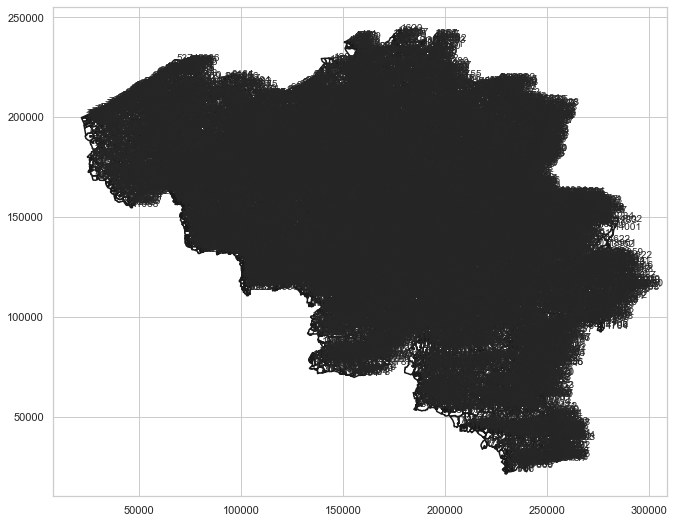

In [61]:
plot_map (sf)

### Plotting a zoomed map

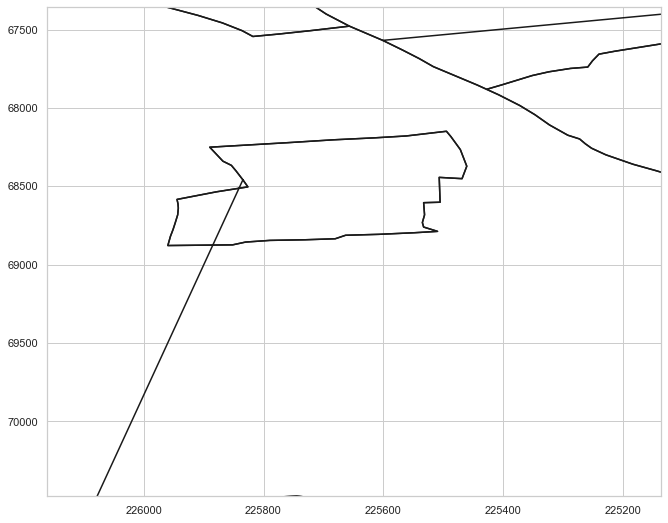

In [62]:
y_lim = (70477.18909999728, 67356.412110000217) # latitude 
x_lim = (226160.88709999993, 225136.20309999958) # longitude
plot_map(sf, x_lim, y_lim)

### Plotting a single shape over a complete map

In [42]:
def plot_map2(id, sf, x_lim = None, y_lim = None, figsize=(11,9)):
    '''
    Plot map with lim coordinates
    '''
   
    plt.figure(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat, 'r', linewidth=3) 
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

<ipython-input-42-d156c29f1e74>:21: UserWarning: Attempting to set identical left == right == 3769000.0 results in singular transformations; automatically expanding.
  plt.xlim(x_lim)


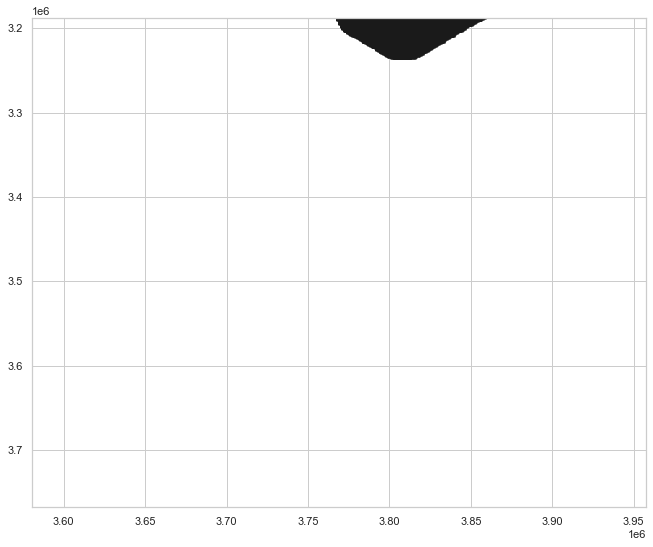

In [43]:
plot_map2(25, sf, x_lim, y_lim)